In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [64]:
data=pd.read_csv("tcs.csv")
#data.head()
data=data.dropna()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-25,149.837006,149.837006,122.375000,123.494003,67.378128,136928.0
1,2004-08-26,124.000000,124.625000,121.912003,122.375000,66.767601,40443200.0
2,2004-08-27,122.800003,122.800003,119.820000,120.332001,65.652962,30646000.0
3,2004-08-30,121.237999,123.750000,120.625000,123.345001,67.296806,24465208.0
4,2004-08-31,123.311996,123.750000,122.000000,123.512001,67.387932,21194656.0


In [65]:
df=data.iloc[:,[4]].values
df.shape

(3530, 1)

In [68]:
dmax=df.max()
dmin=df.min()

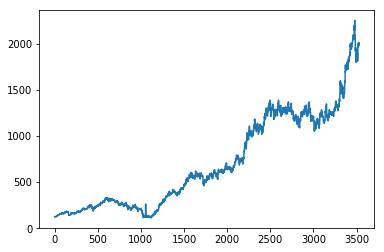

In [26]:
plt.plot(df)
plt.show()


In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)


<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [28]:
train_size = int(len(df) * 0.80)
test_size=int(len(df))-train_size
train_size

2824

In [29]:
test_size

706

In [30]:
train=df[0:train_size,:]
train.shape


(2824, 1)

In [31]:
test=df[train_size:len(df),:]
test.shape

(706, 1)

In [32]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [33]:
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
print("train-",len(trainX),"test-",len(trainY))
trainX.shape

train- 2822 test- 2822


(2822, 1)

In [35]:
print("train-",len(testX),"test-",len(testY))

train- 704 test- 704


In [36]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
print(trainX.shape[0])
print(testX[0])


2822
[[0.51278915]]


In [38]:
model = Sequential()

model.add(LSTM(50,input_shape=(1,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)
print(model.summary())

compilation time :  0.01815509796142578
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
________________________________

In [40]:
start = time.time()
model.fit(trainX,trainY,batch_size=128,epochs=100,validation_split=0.05)
end = time.time()
print("Training-time:::---",end-start)

Train on 2680 samples, validate on 142 samples
Epoch 1/100
2680/2680 [==============================] - 0s 49us/step - loss: 3.0336e-04 - val_loss: 4.8536e-05
Epoch 2/100
2680/2680 [==============================] - 0s 39us/step - loss: 2.8316e-04 - val_loss: 1.0488e-04
Epoch 3/100
2680/2680 [==============================] - 0s 39us/step - loss: 2.9104e-04 - val_loss: 2.6865e-04
Epoch 4/100
2680/2680 [==============================] - 0s 40us/step - loss: 2.9881e-04 - val_loss: 5.0150e-05
Epoch 5/100
2680/2680 [==============================] - 0s 40us/step - loss: 2.8473e-04 - val_loss: 5.1043e-05
Epoch 6/100
2680/2680 [==============================] - 0s 41us/step - loss: 3.0572e-04 - val_loss: 5.0208e-05
Epoch 7/100
2680/2680 [==============================] - 0s 41us/step - loss: 2.8440e-04 - val_loss: 1.3824e-04
Epoch 8/100
2680/2680 [==============================] - 0s 42us/step - loss: 2.9220e-04 - val_loss: 5.0211e-05
Epoch 9/100
2680/2680 [==============================] - 

2680/2680 [==============================] - 0s 47us/step - loss: 2.6788e-04 - val_loss: 1.6555e-04
Epoch 74/100
2680/2680 [==============================] - 0s 37us/step - loss: 2.4450e-04 - val_loss: 1.5602e-04
Epoch 75/100
2680/2680 [==============================] - 0s 38us/step - loss: 2.6127e-04 - val_loss: 5.4702e-05
Epoch 76/100
2680/2680 [==============================] - 0s 37us/step - loss: 2.6723e-04 - val_loss: 1.4560e-04
Epoch 77/100
2680/2680 [==============================] - 0s 38us/step - loss: 2.6953e-04 - val_loss: 4.9556e-05
Epoch 78/100
2680/2680 [==============================] - 0s 38us/step - loss: 2.6409e-04 - val_loss: 1.8875e-04
Epoch 79/100
2680/2680 [==============================] - 0s 37us/step - loss: 2.7361e-04 - val_loss: 1.6540e-04
Epoch 80/100
2680/2680 [==============================] - 0s 38us/step - loss: 2.8509e-04 - val_loss: 6.1859e-05
Epoch 81/100
2680/2680 [==============================] - 0s 36us/step - loss: 2.5393e-04 - val_loss: 1.0100e

In [41]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [44]:
trainPredict.shape

(2822, 1)

In [42]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

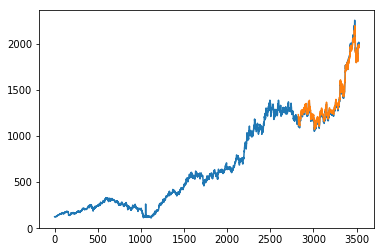

In [47]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [80]:
#predict single value

a=1989.75

a1=(a-dmin)/(dmax-dmin)
a2=np.array([[[a1]]])

pred=model.predict(a2)

a3=pred[0][0]

a4=a3*(dmax-dmin)+dmin

In [81]:
a4


1966.990169227951